<a href="https://colab.research.google.com/github/manoharvirati/stock-movement-prediction/blob/master/asian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import 

In [5]:
df1=pd.read_csv("ASIANPAINT.csv",parse_dates=['Date'])

In [6]:
df1.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [7]:
k=['Trades', 'Deliverable Volume','%Deliverble']
df1.drop(k,axis=1,inplace=True)

In [8]:
df1.tail(1)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
5140,2020-08-31,ASIANPAINT,EQ,1958.1,1977.0,1983.9,1881.25,1894.95,1899.1,1924.67,2738546,5.270796e+14


In [9]:
df1['Turnover']=df1['Turnover'].apply(lambda x : x/10000000)

In [10]:
df1.head(1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5141 entries, 0 to 5140
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5141 non-null   datetime64[ns]
 1   Symbol      5141 non-null   object        
 2   Series      5141 non-null   object        
 3   Prev Close  5141 non-null   float64       
 4   Open        5141 non-null   float64       
 5   High        5141 non-null   float64       
 6   Low         5141 non-null   float64       
 7   Last        5141 non-null   float64       
 8   Close       5141 non-null   float64       
 9   VWAP        5141 non-null   float64       
 10  Volume      5141 non-null   int64         
 11  Turnover    5141 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 482.1+ KB


In [11]:
#prev Close---> previous days market close value.
#open--> todays open price in stock market.
#high-->highest price today in stock market.
#Low-->lowest price today in stock market.
#last-->It is the  price of stock which was bought last in today.
#investors buy the stock from companies expecting to get profits.
#close-->todays closing price.
#vwap--> volume weighted average price (p1*w1+p2*w2+.....)/(w1+w2+w3....)
#volume -> quantiy sold.

In [12]:
df1['date']=pd.to_datetime(df1['Date']).dt.day
df1['year']=pd.to_datetime(df1['Date']).dt.year
df1['month']=pd.to_datetime(df1['Date']).dt.month

In [13]:
df1.head(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,date,year,month
0,2000-01-03,ASIANPAINT,EQ,361.20,370.0,390.0,370.0,385.0,381.65,380.54,3318,12626.1725,3,2000,1
1,2000-01-04,ASIANPAINT,EQ,381.65,380.0,392.0,375.0,390.0,385.55,383.50,4818,18476.9865,4,2000,1
2,2000-01-05,ASIANPAINT,EQ,385.55,371.5,390.0,371.5,383.0,383.00,379.81,2628,9981.3845,5,2000,1
3,2000-01-06,ASIANPAINT,EQ,383.00,384.9,384.9,374.5,375.1,377.50,379.88,3354,12741.1440,6,2000,1
4,2000-01-07,ASIANPAINT,EQ,377.50,376.0,390.0,370.0,389.0,385.70,383.38,9589,36762.7470,7,2000,1


In [14]:
df1.set_index(df1['Date'])

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,date,year,month
Date,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,ASIANPAINT,EQ,361.20,370.00,390.00,370.00,385.00,381.65,380.54,3318,1.262617e+04,3,2000,1
2000-01-04,2000-01-04,ASIANPAINT,EQ,381.65,380.00,392.00,375.00,390.00,385.55,383.50,4818,1.847699e+04,4,2000,1
2000-01-05,2000-01-05,ASIANPAINT,EQ,385.55,371.50,390.00,371.50,383.00,383.00,379.81,2628,9.981385e+03,5,2000,1
2000-01-06,2000-01-06,ASIANPAINT,EQ,383.00,384.90,384.90,374.50,375.10,377.50,379.88,3354,1.274114e+04,6,2000,1
2000-01-07,2000-01-07,ASIANPAINT,EQ,377.50,376.00,390.00,370.00,389.00,385.70,383.38,9589,3.676275e+04,7,2000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-25,2020-08-25,ASIANPAINT,EQ,1962.15,1964.25,2016.85,1964.00,2002.95,2000.60,1989.59,3544554,7.052209e+07,25,2020,8
2020-08-26,2020-08-26,ASIANPAINT,EQ,2000.60,2000.95,2009.00,1955.50,1970.40,1971.40,1971.77,2245860,4.428321e+07,26,2020,8
2020-08-27,2020-08-27,ASIANPAINT,EQ,1971.40,1980.90,2009.00,1970.05,1985.00,1982.50,1988.53,3116307,6.196876e+07,27,2020,8


In [15]:
df1.drop('Date',axis=1,inplace=True)

In [16]:
df1.head(1),df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5141 entries, 0 to 5140
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      5141 non-null   object 
 1   Series      5141 non-null   object 
 2   Prev Close  5141 non-null   float64
 3   Open        5141 non-null   float64
 4   High        5141 non-null   float64
 5   Low         5141 non-null   float64
 6   Last        5141 non-null   float64
 7   Close       5141 non-null   float64
 8   VWAP        5141 non-null   float64
 9   Volume      5141 non-null   int64  
 10  Turnover    5141 non-null   float64
 11  date        5141 non-null   int64  
 12  year        5141 non-null   int64  
 13  month       5141 non-null   int64  
dtypes: float64(8), int64(4), object(2)
memory usage: 562.4+ KB


(       Symbol Series  Prev Close   Open  ...    Turnover  date  year  month
 0  ASIANPAINT     EQ       361.2  370.0  ...  12626.1725     3  2000      1
 
 [1 rows x 14 columns], None)

In [17]:
k=df1['year'].unique()
k.tolist()

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

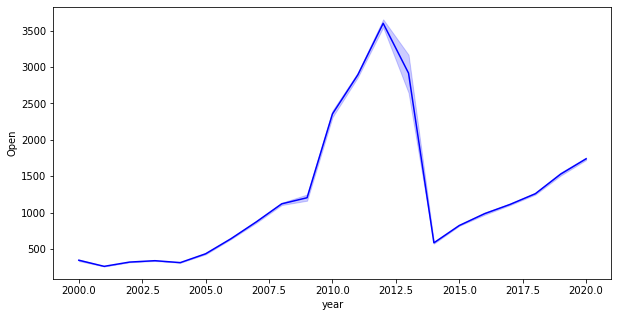

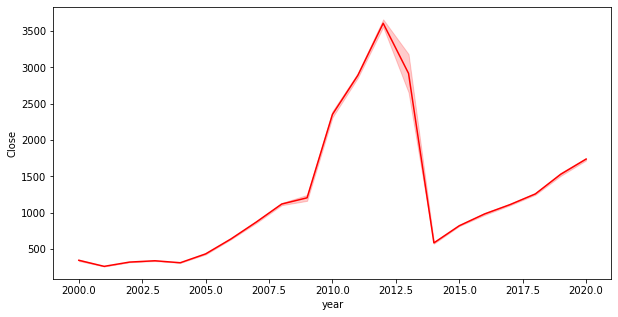

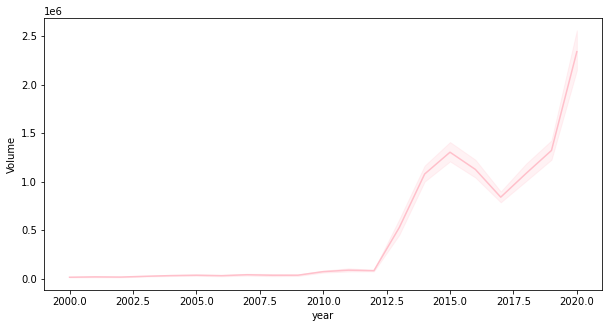

In [18]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.lineplot(x='year',y='Open',color='b',data=df1)
plt.figure(figsize=(10,5))
sns.lineplot(x='year',y='Close',color='r',data=df1)
plt.figure(figsize=(10,5))
sns.lineplot(x='year',y='Volume',color='pink',data=df1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


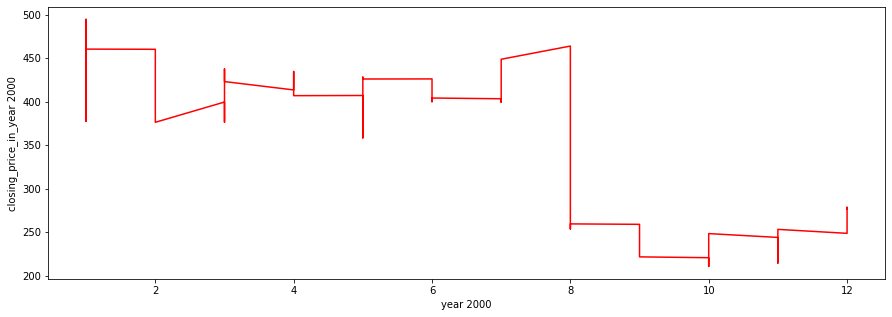

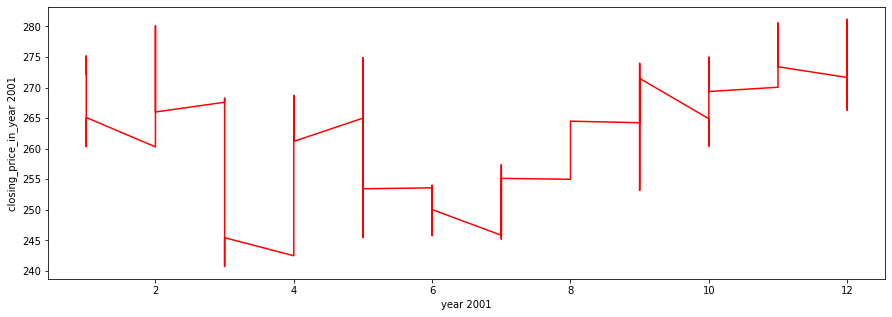

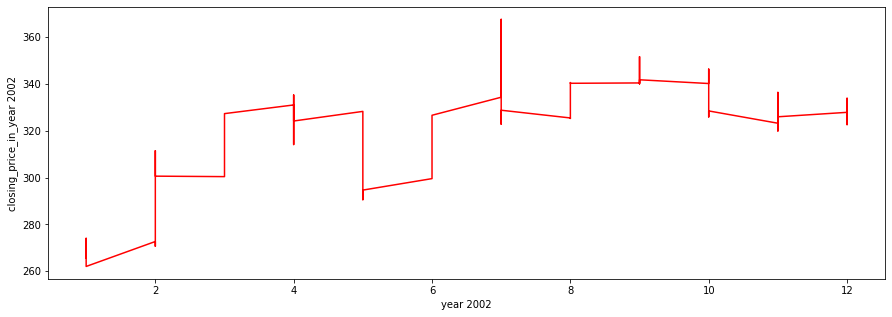

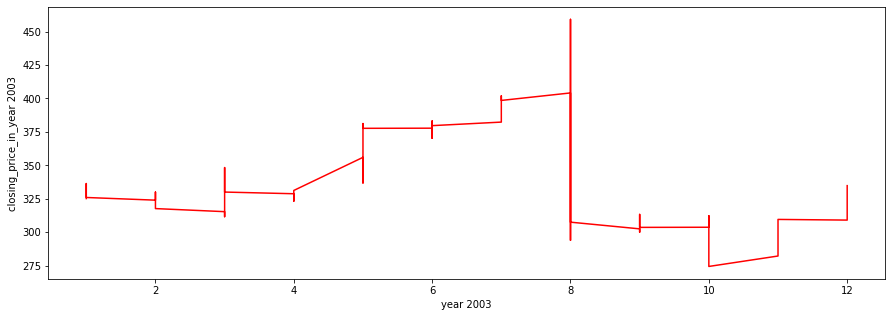

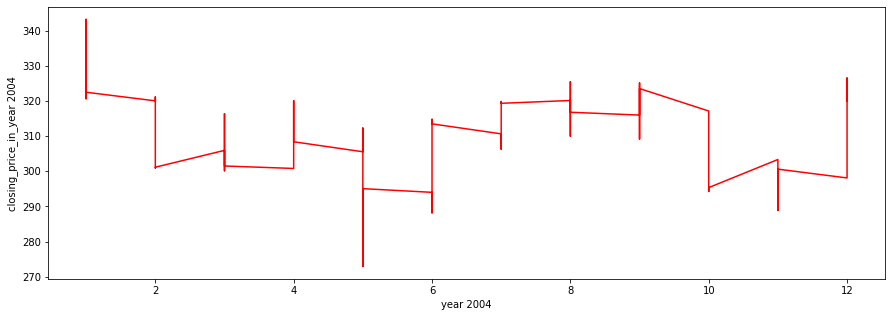

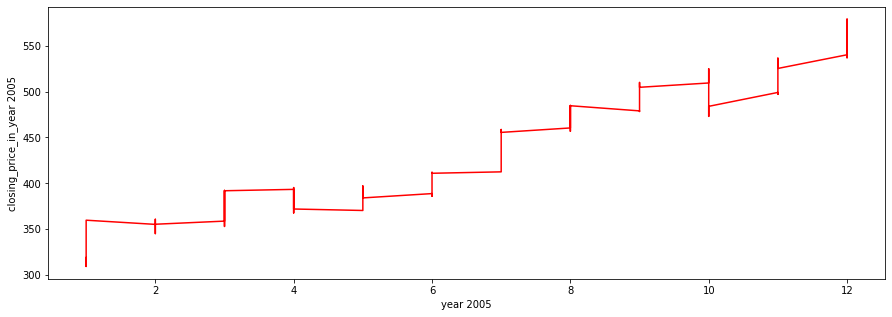

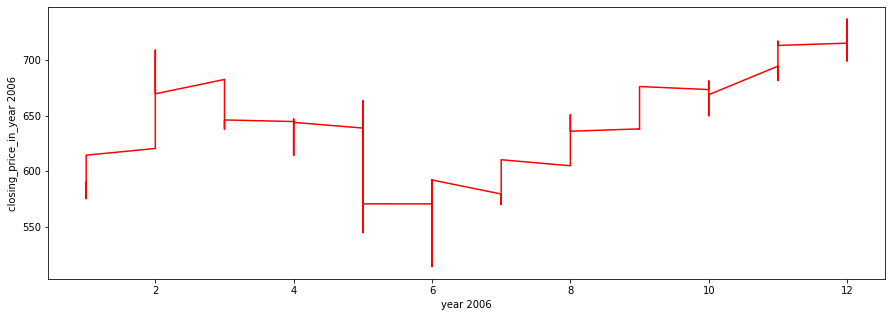

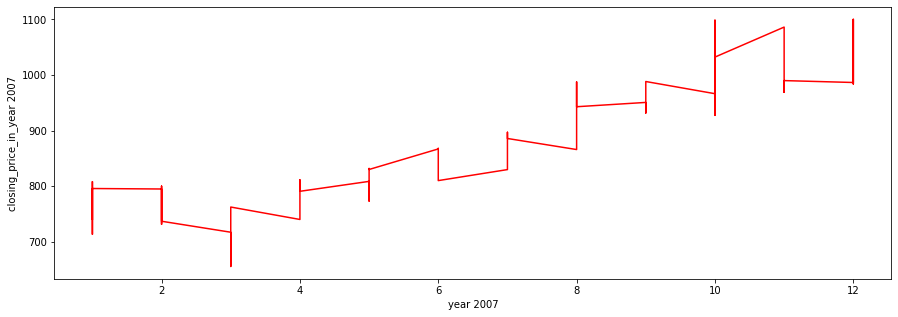

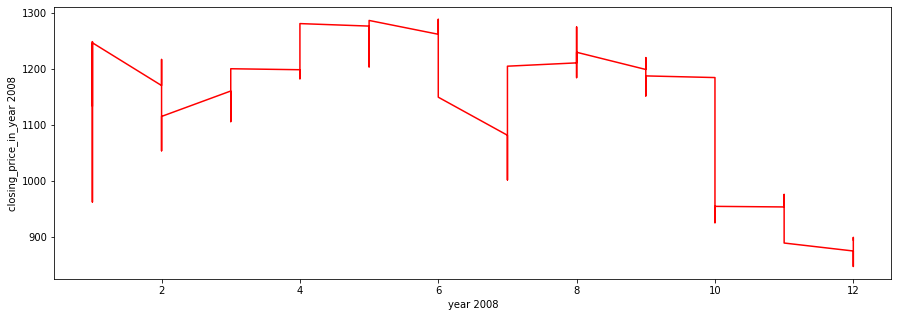

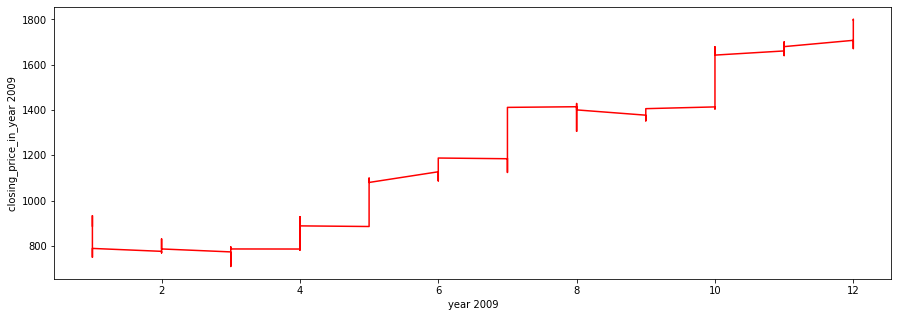

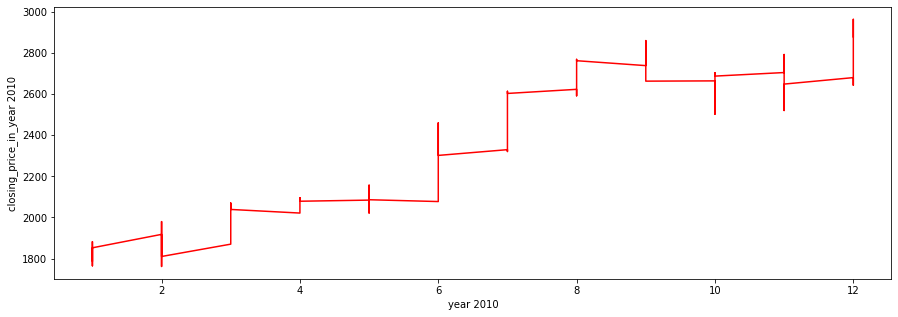

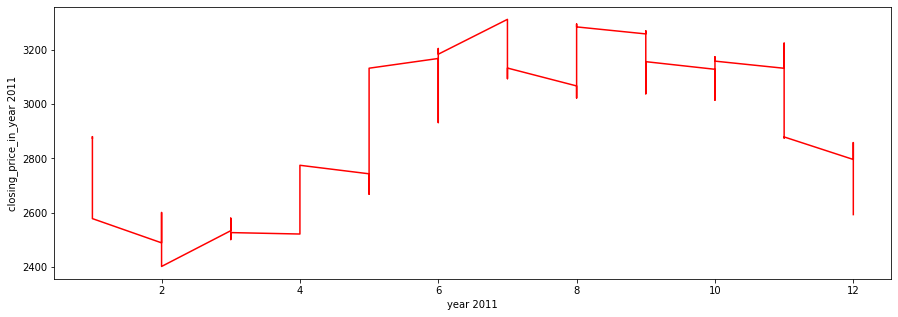

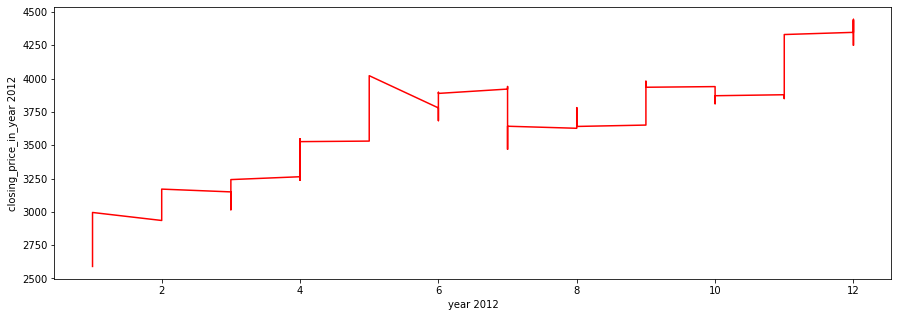

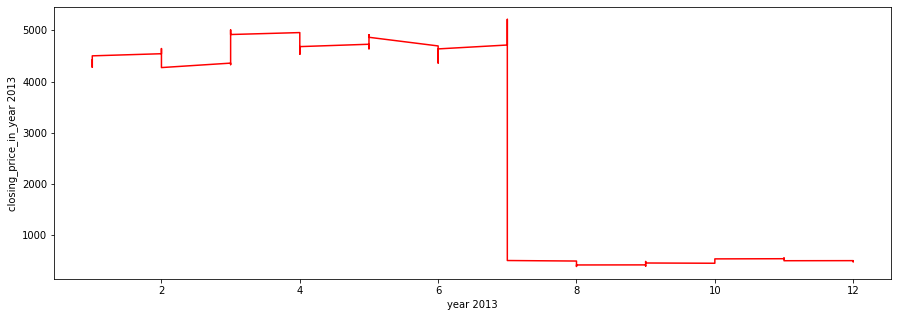

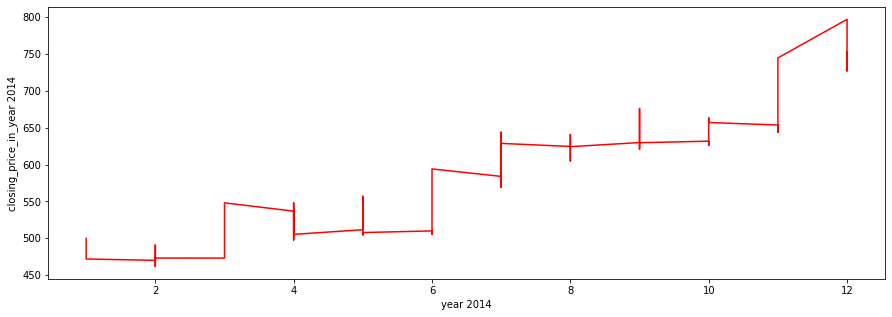

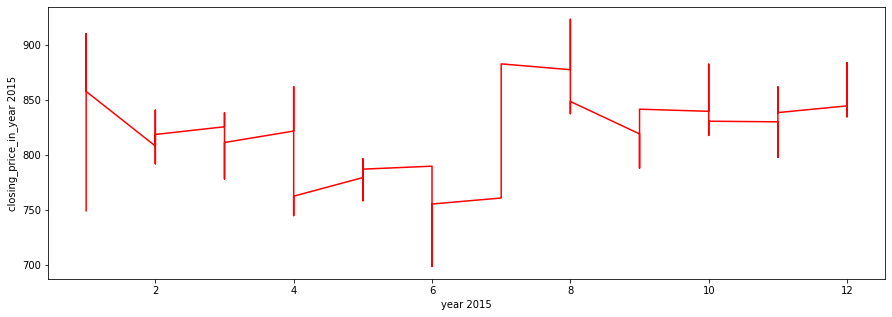

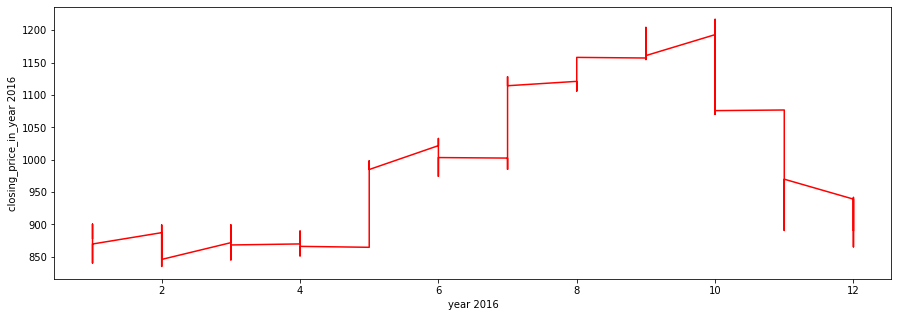

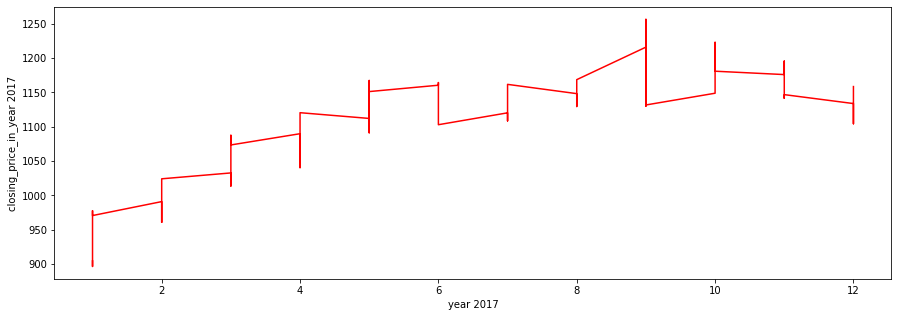

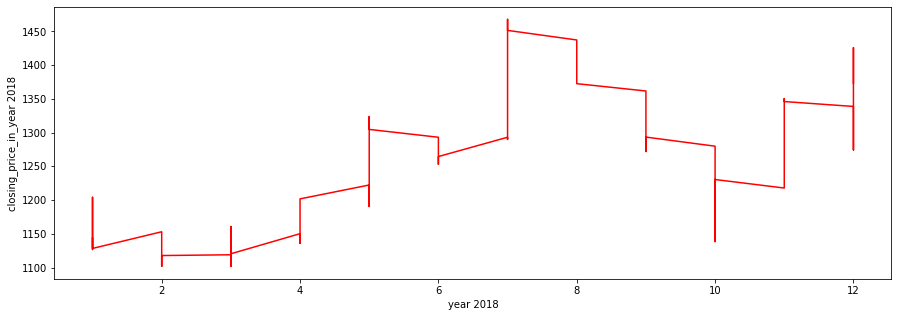

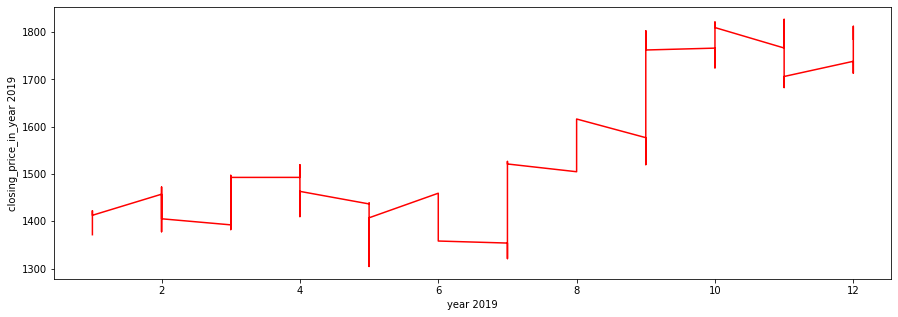

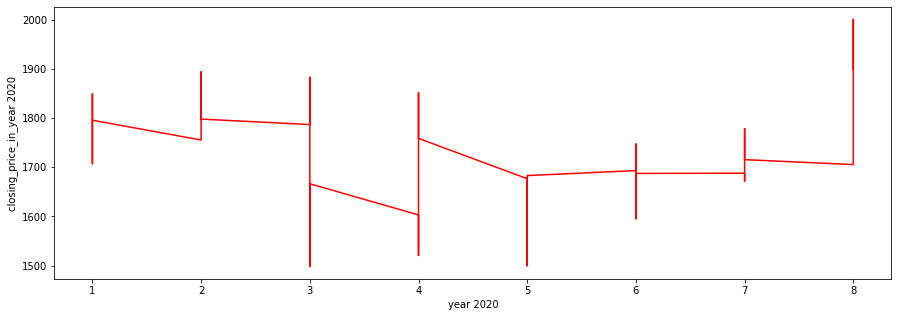

In [19]:
#we will give figures for year wise "close" prices.
for i in df1['year'].unique().tolist():
  plt.figure(figsize=(15,5))
  plt.plot(df1[df1['year']==i]['month'],df1[df1['year']==i]['Close'],'r')
  plt.xlabel('year {}'.format(i))
  plt.ylabel('closing_price_in_year {}'.format(i)) 

1.So if we observe all the graphs carefully at start of (2003) the stockprice is around (300-400).

2.And from 2003 to 2012 ther is huge increase 


In [20]:
#now we will see the trend by using moving average methods.
#(1.Fate signal moving average of 10 days 2.Slow signal above 50 days)
#lets create fast signal (10 days)
fast=[]
for i in range(10): fast.append(0)
for i in range(10,len(df1)):
  fast.append(round(df1[i-10:i]['Close'].mean(),2))

In [21]:
df1['Fast_Signal']=fast

In [22]:
#lets create a slow signalnow
slow=[]
#lets create slow signal with 50 days moving average
slow=[]
for i in range(60): slow.append(0)
for i in range(60,len(df1)):
  slow.append(round(df1[i-60:i]['Close'].mean(),2))
df1['Slow_signal']=slow

In [23]:
df1.tail(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,date,year,month,Fast_Signal,Slow_signal
5136,ASIANPAINT,EQ,1962.15,1964.25,2016.85,1964.00,2002.95,2000.6,1989.59,3544554,7.052209e+07,25,2020,8,1858.35,1720.74
5137,ASIANPAINT,EQ,2000.60,2000.95,2009.00,1955.50,1970.40,1971.4,1971.77,2245860,4.428321e+07,26,2020,8,1879.45,1725.60
5138,ASIANPAINT,EQ,1971.40,1980.90,2009.00,1970.05,1985.00,1982.5,1988.53,3116307,6.196876e+07,27,2020,8,1896.87,1729.84
5139,ASIANPAINT,EQ,1982.50,1994.00,1997.00,1953.30,1961.00,1958.1,1964.60,1842553,3.619878e+07,28,2020,8,1914.86,1735.66
5140,ASIANPAINT,EQ,1958.10,1977.00,1983.90,1881.25,1894.95,1899.1,1924.67,2738546,5.270796e+07,31,2020,8,1930.41,1740.98


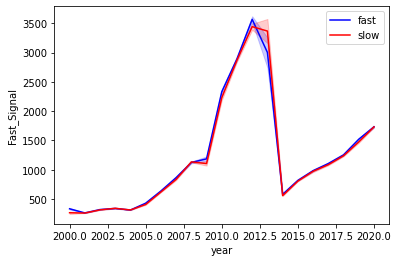

In [24]:
sns.lineplot(x='year',y='Fast_Signal',color='b',label='fast',data=df1)
sns.lineplot(x='year',y='Slow_signal',color='r',label='slow',data=df1)
plt.legend()

In [25]:
#we can definetly say that the stock price of asian paints had reached to peak point on the years(2011,2012)
#And suddenly there is great fall in stock price in 2014. And then from 2014 to till now it is slowly picking up.

In [26]:
#Now we will check the closing price for last 6 months.(6*30=180 days)
k=df1.tail(180)
k=k.reset_index()

Text(0, 0.5, 'closing_price')

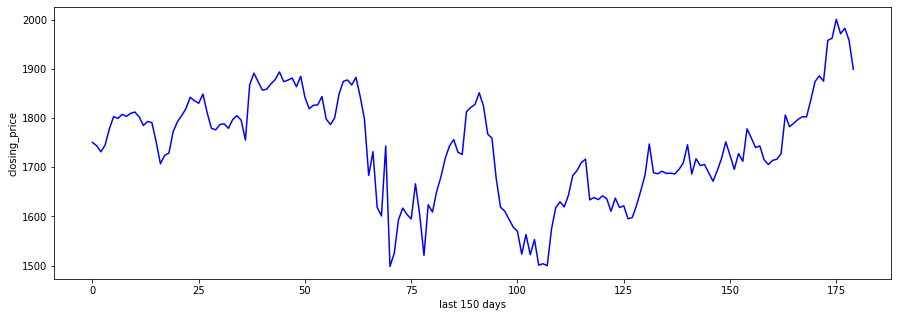

In [27]:
#now we will plot the closing price to understand what is going on...
plt.figure(figsize=(15,5))
plt.plot(k['Close'],'b')
plt.xlabel("last 150 days")
plt.ylabel("closing_price")

In [28]:
#now lets make train,test data for making model
# we will consider last 100 days data as test and remaining data as train
train=df1.iloc[:,7:8].values
print(train.shape)

(5141, 1)


In [29]:
#lets scale them now
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
train=sc.fit_transform(train)

In [30]:
#lets prepare x_train,y_train now based on moving average 30-days closing price
x_train,y_train=[],[]

for i in range(30,len(train)):
  x_train.append(train[i-30:i,0])
  y_train.append(train[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape,y_train.shape

((5111, 30, 1), (5111,))

In [71]:
#now lets bring keraas into the feature.
import keras
from keras.models import Sequential,load_model
from keras.layers import Dense,LSTM,Dropout
x_train.shape[1]

30

In [115]:
train[1,0]

0.034943576519036054

In [67]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(30,1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2)) 
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
#regressor.fit(x_train,y_train,epochs=20,batch_size=30)

In [68]:
model.fit(x_train,y_train,epochs=20,batch_size=30)

Epoch 1/20
171/171 [==============================] - 10s 58ms/step - loss: 0.0054
Epoch 2/20
171/171 [==============================] - 10s 60ms/step - loss: 0.0030
Epoch 3/20
171/171 [==============================] - 10s 60ms/step - loss: 0.0024
Epoch 4/20
171/171 [==============================] - 10s 60ms/step - loss: 0.0023
Epoch 5/20
171/171 [==============================] - 10s 60ms/step - loss: 0.0017
Epoch 6/20
171/171 [==============================] - 10s 59ms/step - loss: 0.0016
Epoch 7/20
171/171 [==============================] - 10s 60ms/step - loss: 0.0016
Epoch 8/20
171/171 [==============================] - 11s 63ms/step - loss: 0.0016
Epoch 9/20
171/171 [==============================] - 10s 61ms/step - loss: 0.0013
Epoch 10/20
171/171 [==============================] - 10s 60ms/step - loss: 0.0013
Epoch 11/20
171/171 [==============================] - 10s 61ms/step - loss: 0.0011
Epoch 12/20
171/171 [==============================] - 10s 61ms/step - loss: 0.0011
E

In [69]:
model.save('lstm_model.h5')

In [74]:
model=load_model('lstm_model.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [45]:
test=df1.iloc[-130:,[7]].values
test

array([[1842.25],
       [1818.95],
       [1826.1 ],
       [1826.65],
       [1843.8 ],
       [1797.95],
       [1786.8 ],
       [1800.55],
       [1847.95],
       [1874.45],
       [1877.45],
       [1867.15],
       [1882.85],
       [1843.35],
       [1797.7 ],
       [1683.4 ],
       [1731.6 ],
       [1618.2 ],
       [1601.2 ],
       [1742.95],
       [1498.45],
       [1524.85],
       [1593.15],
       [1616.95],
       [1604.15],
       [1594.95],
       [1666.5 ],
       [1603.2 ],
       [1520.9 ],
       [1623.8 ],
       [1608.95],
       [1651.35],
       [1680.85],
       [1718.2 ],
       [1743.1 ],
       [1756.25],
       [1730.45],
       [1726.  ],
       [1813.  ],
       [1821.65],
       [1827.55],
       [1851.35],
       [1824.4 ],
       [1767.5 ],
       [1758.7 ],
       [1676.8 ],
       [1619.15],
       [1610.65],
       [1594.3 ],
       [1578.4 ],
       [1569.6 ],
       [1523.35],
       [1563.3 ],
       [1522.4 ],
       [1552.95],
       [15

In [85]:
test.shape

(130, 1)

In [53]:
#now prepare test data x_test
inputs=test.reshape(-1,1)
inputs=sc.transform(inputs)
x_test=[]
y_test=[]
for i in range(30,130):
  x_test.append(inputs[i-30:i,0])
  y_test.append(inputs[i-30:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [54]:
x_test

array([[[0.32614671],
        [0.3214889 ],
        [0.32291823],
        ...,
        [0.27835917],
        [0.2619069 ],
        [0.28247724]],

       [[0.3214889 ],
        [0.32291823],
        [0.32302818],
        ...,
        [0.2619069 ],
        [0.28247724],
        [0.27950863]],

       [[0.32291823],
        [0.32302818],
        [0.32645657],
        ...,
        [0.28247724],
        [0.27950863],
        [0.28798465]],

       ...,

       [[0.29635072],
        [0.30128839],
        [0.30802523],
        ...,
        [0.35011545],
        [0.35780183],
        [0.35196458]],

       [[0.30128839],
        [0.30802523],
        [0.3025578 ],
        ...,
        [0.35780183],
        [0.35196458],
        [0.35418353]],

       [[0.30802523],
        [0.3025578 ],
        [0.29686048],
        ...,
        [0.35196458],
        [0.35418353],
        [0.34930583]]])

In [100]:
#now once check the shape of x_test and send it to the neural nets to get prediction
x_test.shape

(100, 30, 1)

In [101]:
pred_stock=model.predict(x_test)
pred_stock

array([[0.28735155],
       [0.2864391 ],
       [0.28691506],
       [0.289155  ],
       [0.29315466],
       [0.29840535],
       [0.30405062],
       [0.30862302],
       [0.31143603],
       [0.31434163],
       [0.3179955 ],
       [0.32206786],
       [0.32634008],
       [0.32975033],
       [0.33074594],
       [0.3293763 ],
       [0.3251063 ],
       [0.31805176],
       [0.30982426],
       [0.30195132],
       [0.29526925],
       [0.29007363],
       [0.28553018],
       [0.28222603],
       [0.27954185],
       [0.277765  ],
       [0.2759128 ],
       [0.27377993],
       [0.2715294 ],
       [0.2708143 ],
       [0.27262372],
       [0.27645725],
       [0.2808189 ],
       [0.2849943 ],
       [0.28920573],
       [0.29338253],
       [0.29741138],
       [0.301071  ],
       [0.3024828 ],
       [0.30164772],
       [0.29947627],
       [0.2971688 ],
       [0.29531538],
       [0.2936333 ],
       [0.29260156],
       [0.2919516 ],
       [0.29155013],
       [0.290

In [102]:
pred_stock=sc.inverse_transform(pred_stock)
pred_stock

array([[1648.183 ],
       [1643.6187],
       [1645.9996],
       [1657.2046],
       [1677.2122],
       [1703.478 ],
       [1731.7177],
       [1754.5903],
       [1768.662 ],
       [1783.1969],
       [1801.4747],
       [1821.8462],
       [1843.2173],
       [1860.2766],
       [1865.257 ],
       [1858.4056],
       [1837.0455],
       [1801.7562],
       [1760.5994],
       [1721.2162],
       [1687.7902],
       [1661.7998],
       [1639.0719],
       [1622.5433],
       [1609.1162],
       [1600.2278],
       [1590.9624],
       [1580.2931],
       [1569.0352],
       [1565.4579],
       [1574.5093],
       [1593.6859],
       [1615.5045],
       [1636.3912],
       [1657.4583],
       [1678.352 ],
       [1698.5059],
       [1716.8125],
       [1723.8749],
       [1719.6975],
       [1708.8351],
       [1697.2924],
       [1688.0209],
       [1679.6066],
       [1674.4454],
       [1671.1941],
       [1669.1858],
       [1665.5084],
       [1660.1504],
       [1656.6454],


In [87]:
y_test=df1.iloc[-100:,[7]]
y_test=np.array(y_test)
y_test

array([[1608.95],
       [1651.35],
       [1680.85],
       [1718.2 ],
       [1743.1 ],
       [1756.25],
       [1730.45],
       [1726.  ],
       [1813.  ],
       [1821.65],
       [1827.55],
       [1851.35],
       [1824.4 ],
       [1767.5 ],
       [1758.7 ],
       [1676.8 ],
       [1619.15],
       [1610.65],
       [1594.3 ],
       [1578.4 ],
       [1569.6 ],
       [1523.35],
       [1563.3 ],
       [1522.4 ],
       [1552.95],
       [1501.1 ],
       [1503.95],
       [1500.05],
       [1574.3 ],
       [1617.9 ],
       [1629.85],
       [1619.45],
       [1643.6 ],
       [1683.1 ],
       [1693.25],
       [1709.3 ],
       [1716.55],
       [1633.75],
       [1638.55],
       [1634.25],
       [1642.05],
       [1635.95],
       [1610.6 ],
       [1637.35],
       [1618.2 ],
       [1621.7 ],
       [1595.4 ],
       [1597.8 ],
       [1622.5 ],
       [1652.15],
       [1683.9 ],
       [1747.25],
       [1689.  ],
       [1686.75],
       [1691.95],
       [16

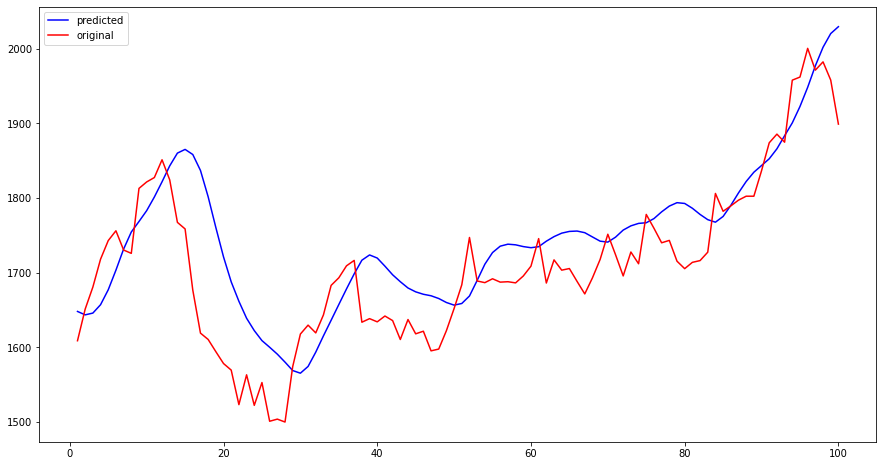

In [103]:
plt.figure(figsize=(15,8))
plt.plot(range(1,101),pred_stock,'b',label='predicted')
plt.plot(range(1,101),y_test,'r',label='original')
plt.legend()

In [107]:
#pred_stock=sc.inverse_transform(pred_stock)
#pred_stock
#y_test=sc.inverse_
pred_stock.shape
#accu=model.evaluate(y_test,pred_stock)

(100, 1)